Shape of Original Image : [512, 512, 3]
Shape of Predicted :  [256, 256]
Unique values, category of transformed mask :  [0 3 7 9]


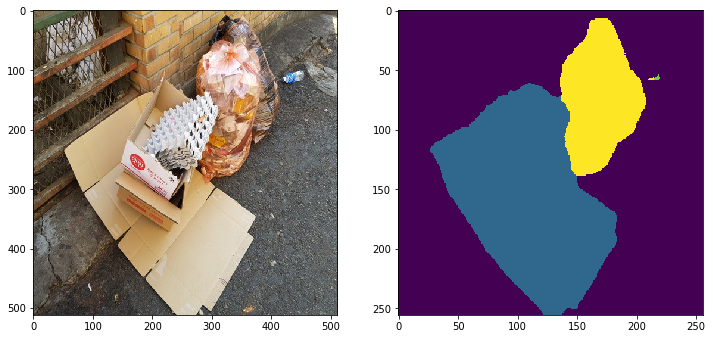

In [26]:
'''
{'UNKNOWN': 1,
 'General trash': 2,
 'Paper': 3,
 'Paper pack': 4,
 'Metal': 5,
 'Glass': 6,
 'Plastic': 7,
 'Styrofoam': 8,
 'Plastic bag': 9,
 'Battery': 10,
 'Clothing': 11}
 '''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import torch
from torch.utils.data import Dataset, DataLoader

from importlib import import_module
import os, random, argparse
from tqdm import tqdm
from pprint import pprint

%matplotlib inline

class CFG:
    PROJECT_PATH = "/opt/ml/save_the_earth" # 기본 프로젝트 디렉터리
    BASE_DATA_PATH = '/opt/ml/input/data' # 데이터가 저장된 디렉터리

    submission_path = '/opt/ml/save_the_earth/docs/results/FCN8s_baseline_model.pt_valloss.csv' # submission csv 파일
    docs_path = 'docs'
    model_path = 'models'


result = pd.read_csv(CFG.submission_path)


i = 150
image = cv2.imread(os.path.join(CFG.BASE_DATA_PATH, result['image_id'][i]))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
image /= 255.0
prediction = np.array(result['PredictionString'][i].split()).reshape(256,256).astype(np.int8)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

print('Shape of Original Image :', list(image.shape))
print('Shape of Predicted : ', list(prediction.shape))
print('Unique values, category of transformed mask : ', np.unique(prediction))

# Original image
ax1.imshow(image)
ax1.grid(False)

# Predicted
ax2.imshow(prediction)
ax2.grid(False)

plt.show()

